# Battle of Water Demand Forecasting (BWDF)


### Background and research direction
The Battle of Water Demand Forecasting (BWDF), organized in the context of the 3rd International WDSA-CCWI Joint Conference in Ferrara, Italy (https://wdsa-ccwi2024.it), aims at comparing the effectiveness of methods for the **short-term prediction of urban water demand**, relying on Supervisory Control and Data Acquisition (SCADA) measurements, and mass balance calculations, in a set of real District Metered Areas (DMAs).

### Goal of the challenge, materials, and rules
The challenge proposed in the context of the BWDF is focused on the forecast of the water demands with reference to a case-study WDN located in the North-East of Italy, supplying a variety of areas that are considerably different as far as characteristics, size, and average water demand are concerned. Specifically, **forecasting is required for ten DMAs** of the WDN concerned with the **aim of defining optimal system operation for the near future (i.e., upcoming day and week), and optimizing the energy purchase**. The water demand of each DMA is assumed to be represented by the net inflow and thus it **includes all the types of water consumption and leakages of the DMA**.

### DMA characteristics
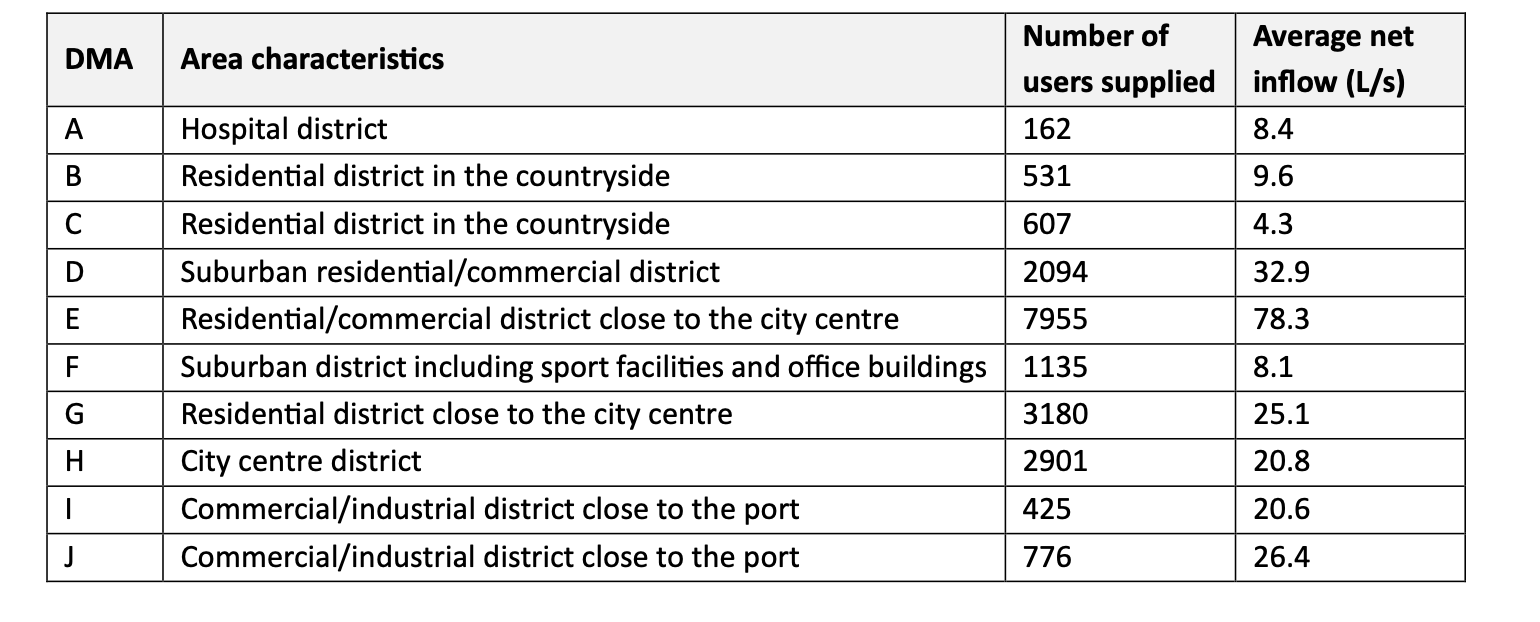


The water utility managing the DMAs concerned provided the hourly net-inflow time series $Q_{net}$ (L/s) for each DMA in relation to the period from 1 January 2021 to 31 March 2023. 

Net-inflow time series include water consumptions and leakages and are obtained through water balance:

$Q_{net}=\sum_{i=1}^{n_{in}} Q_{in,i} -\sum_{j=1}^{n_{out}} Q_{out,j}$


in which $Q_{in}$ is the flow rate entering the DMA concerned through the 𝑖-th inlet point (𝑖 = 1,2, ... $n_{𝑖𝑛}$) and acquired by the water utility SCADA system, whereas $Q_{out}$ is the flow rate outgoing from the DMA concerned through the 𝑗-th outlet point (𝑗 = 1,2, ... $n_{out}$). It is worth noting that no DMAs with storage facilities are included. Moreover, net-inflow data are not post-processed, so they can show some gaps related to SCADA system malfunctioning and other data collection/transmission issues.

## The challenge

First step in the challenge is to **forecast week 30 of 2022**, for all DMAs, that is, for the period **25/07/2022-31/07/2022**.

Solution should be stored in the file: SolutionTemplate_W1.xlsx

**Deadline for submission**: 31st January 2024

# Files that are needed to run this notebook:

* InflowData_1.xlsx

* WeatherData_1.xlsx

# Content of this notebook

* [1. Exploratory analysis of hourly net-inflow](#sec:eda_net_inflow)

* [2. Exploratory analysis of weather data](#sec:eda_weather)

* [3. Exploratory analysis of joint data](#sec:eda_joint)




In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

<a id='sec:eda_net_inflow'></a>
# 1. Exploratory analysis of flow rate

In [2]:

df = pd.read_excel('InflowData_1.xlsx')
df.head()


,Date-time CET-CEST (DD/MM/YYYY HH:mm),DMA A (L/s),DMA B (L/s),DMA C (L/s),DMA D (L/s),DMA E (L/s),DMA F (L/s),DMA G (L/s),DMA H (L/s),DMA I (L/s),DMA J (L/s)
0,01/01/2021 00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021 01:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021 02:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021 03:00,NaN,NaN,2.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021 04:00,NaN,NaN,2.7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.count()

Date-time CET-CEST (DD/MM/YYYY HH:mm)    13679
DMA A (L/s)                              12914
DMA B (L/s)                              13092
DMA C (L/s)                              13587
DMA D (L/s)                              12773
DMA E (L/s)                              12954
DMA F (L/s)                              11800
DMA G (L/s)                              12204
DMA H (L/s)                              12567
DMA I (L/s)                              12174
DMA J (L/s)                              12801
dtype: int64

In [4]:
df.isnull().sum()

Date-time CET-CEST (DD/MM/YYYY HH:mm)       0
DMA A (L/s)                               765
DMA B (L/s)                               587
DMA C (L/s)                                92
DMA D (L/s)                               906
DMA E (L/s)                               725
DMA F (L/s)                              1879
DMA G (L/s)                              1475
DMA H (L/s)                              1112
DMA I (L/s)                              1505
DMA J (L/s)                               878
dtype: int64

In [5]:
df.dtypes

Date-time CET-CEST (DD/MM/YYYY HH:mm)     object
DMA A (L/s)                              float64
DMA B (L/s)                              float64
DMA C (L/s)                              float64
DMA D (L/s)                              float64
DMA E (L/s)                              float64
DMA F (L/s)                              float64
DMA G (L/s)                              float64
DMA H (L/s)                              float64
DMA I (L/s)                              float64
DMA J (L/s)                              float64
dtype: object

In [6]:
transf_dict = {
    "Date-time CET-CEST (DD/MM/YYYY HH:mm)": "datetime",
    "DMA A (L/s)": "dma_A",
    "DMA B (L/s)": "dma_B",
    "DMA C (L/s)": "dma_C",
    "DMA D (L/s)": "dma_D",
    "DMA E (L/s)": "dma_E",
    "DMA F (L/s)": "dma_F",
    "DMA G (L/s)": "dma_G",
    "DMA H (L/s)": "dma_H",
    "DMA I (L/s)": "dma_I",
    "DMA J (L/s)": "dma_J"  
}

In [7]:
df.rename(columns= transf_dict, inplace=True)
df.head()

,datetime,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J
0,01/01/2021 00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021 01:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021 02:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021 03:00,NaN,NaN,2.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021 04:00,NaN,NaN,2.7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dtypes

datetime     object
dma_A       float64
dma_B       float64
dma_C       float64
dma_D       float64
dma_E       float64
dma_F       float64
dma_G       float64
dma_H       float64
dma_I       float64
dma_J       float64
dtype: object

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'],format='%d/%m/%Y %H:%M')

In [10]:
df.dtypes

datetime    datetime64[ns]
dma_A              float64
dma_B              float64
dma_C              float64
dma_D              float64
dma_E              float64
dma_F              float64
dma_G              float64
dma_H              float64
dma_I              float64
dma_J              float64
dtype: object

In [11]:
df.set_index('datetime', inplace = True)
df.head()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J
datetime,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,NaN,NaN,2.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,NaN,NaN,2.7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J
datetime,,,,,,,,,,
2022-07-24 19:00:00,12.9175,17.7050,10.0100,38.7900,93.9925,8.3325,35.4500,21.735,19.5050,28.4350
2022-07-24 20:00:00,12.8400,17.3500,10.0550,41.6675,93.1325,10.1300,37.9775,19.970,19.7125,30.0125
2022-07-24 21:00:00,11.5575,14.8400,8.0775,42.8400,90.6625,8.1550,NaN,21.120,18.7925,26.8800
2022-07-24 22:00:00,10.4175,12.6925,6.1875,32.8325,83.1500,9.4225,30.6800,19.860,18.7275,25.5650
2022-07-24 23:00:00,11.5250,9.8125,6.3825,25.7250,76.6200,7.0475,28.9600,17.075,20.1125,25.2325


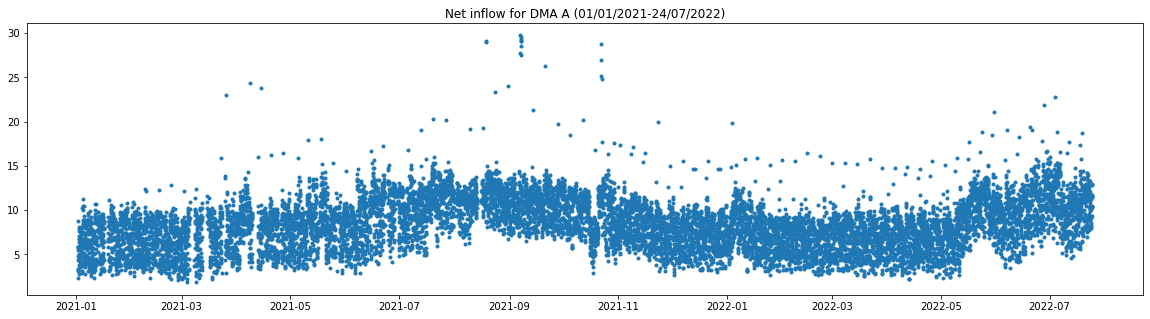

In [13]:
plt.figure(figsize=(20,5)) 
plt.plot(df.index.values, df['dma_A'],linestyle="",marker=".")

plt.title('Net inflow for DMA A (01/01/2021-24/07/2022)')
plt.show()

In [14]:
# TASK: produce the other plots for the remaining DMAs
#...

Text(0.5, 1.0, 'Boxplots per day for DMA A (01/01/2021-24/07/2022)')

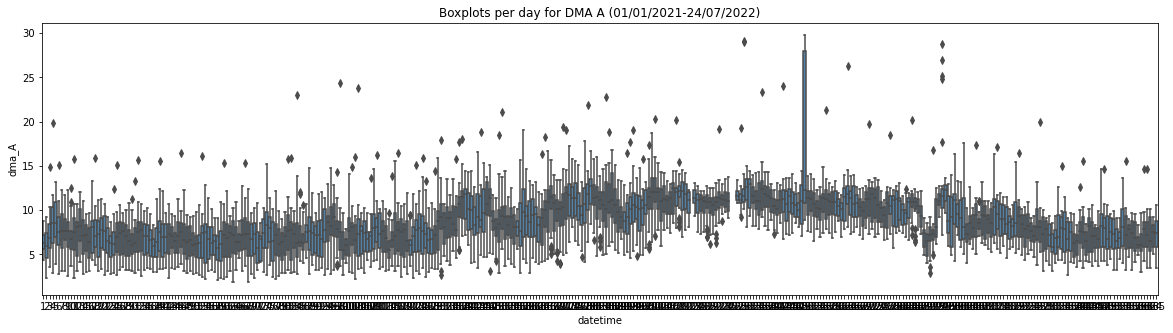

In [15]:
# Boxplot per day
plt.figure(figsize=(20,5))
sns.boxplot(x = df.index.dayofyear,
                y = df['dma_A'],
                color='steelblue')
plt.title('Boxplots per day for DMA A (01/01/2021-24/07/2022)')

In [16]:
# TASK: produce the other boxplots for the remaining DMAs
#...

In [17]:
# create a new dataframe with data from only july 2022, just to see what's going on up to the week we will have to forecast
# this will probably not be needed, but the code is here just in case
df_jul2022 = df.sort_index().loc['01/07/2022 00:00':'24/07/2022 23:00']
df_jul2022.head()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J
datetime,,,,,,,,,,
2022-01-07 00:00:00,6.3825,7.3625,2.8700,27.4875,59.6450,9.8775,19.6475,14.8800,14.7800,20.1400
2022-01-07 01:00:00,5.4050,6.9700,2.5250,28.3150,53.8575,10.0425,16.6300,12.7750,16.8150,21.3775
2022-01-07 02:00:00,5.1750,6.8850,2.3975,28.1725,51.8250,9.8375,16.1000,12.3150,16.4350,20.8600
2022-01-07 03:00:00,5.6425,6.9300,2.3625,26.1800,51.7375,9.6850,15.6425,12.0400,15.5475,19.9375
2022-01-07 04:00:00,5.7250,7.2225,2.3750,27.0675,51.7075,9.4425,15.7325,11.9675,15.0200,19.2975


Text(0.5, 1.0, 'Net-inflow DMA A 1-24 July 2022')

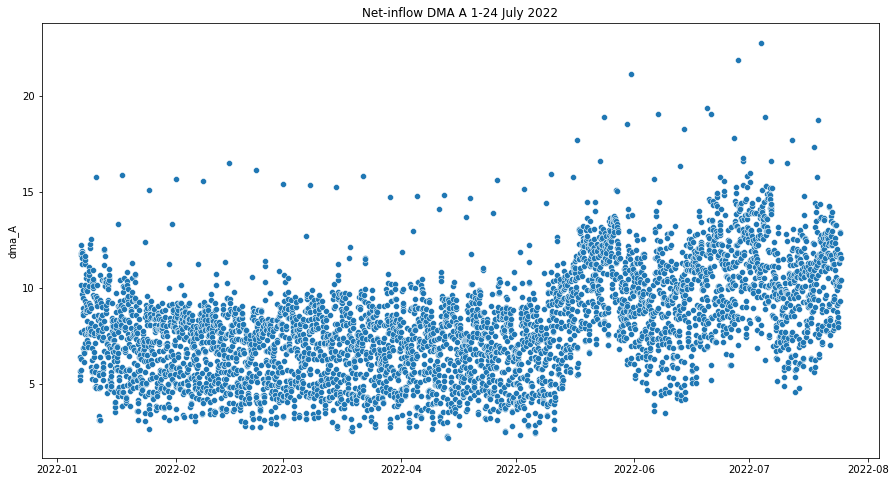

In [18]:

plt.figure(figsize = (15,8))
sns.scatterplot(x=df_jul2022.index.values, y=df_jul2022['dma_A'])
plt.title('Net-inflow DMA A 1-24 July 2022')

Text(0.5, 1.0, 'Boxplots per day DMA A 1-24 July 2022')

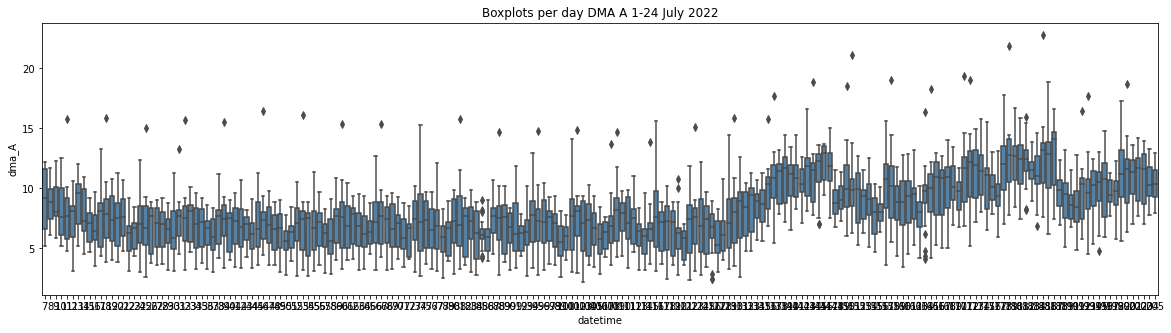

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(x = df_jul2022.index.dayofyear,
                y = df_jul2022['dma_A'],
                color='steelblue')
plt.title('Boxplots per day DMA A 1-24 July 2022')

### One important thing to notice is that we have many missing data and the size of the gaps will influence the way we will handle them. Therefore, it is important to find out the size of the blocks of consecutive NaN.

In [20]:
# to obtain number of consecutive NaN
na_blocks_dma_A = df['dma_A'].notna().cumsum()[df['dma_A'].isna()]
lengths_na_blocks_dma_A = na_blocks_dma_A.groupby(na_blocks_dma_A).agg(len)

In [21]:
lengths_na_blocks_dma_A

dma_A
0        16
90        1
262      13
344      50
384       1
         ..
10003     1
11049     1
11289     1
11383     1
12112     1
Name: dma_A, Length: 79, dtype: int64

In [22]:
#what is the size of blocks of consecutive NaN above 24 hours in length for DMA A?
lengths_na_blocks_dma_A[lengths_na_blocks_dma_A>24]

dma_A
344     50
1408    63
1513    67
1687    44
2036    74
2293    31
3602    34
3706    31
4446    31
4714    58
Name: dma_A, dtype: int64

In [23]:
# TASK: do the same for the other DMAs
#...


<a id='sec:eda_weather'></a>

# 2. Exploratory analysis weather data

In [24]:
df_w = pd.read_excel('WeatherData_1.xlsx' )
df_w

,Date-time CET-CEST (DD/MM/YYYY HH:mm),Rainfall depth (mm),Air temperature (°C),Air humidity (%),Windspeed (km/h)
0,01/01/2021 00:00,0.0,7.2,79.0,9.0
1,01/01/2021 01:00,0.0,7.3,79.0,6.0
2,01/01/2021 02:00,0.0,7.6,78.0,4.0
3,01/01/2021 03:00,0.0,8.2,75.0,4.0
4,01/01/2021 04:00,0.0,7.7,77.0,7.0
...,...,...,...,...,...
13842,31/07/2022 19:00,0.0,26.6,68.0,5.0
13843,31/07/2022 20:00,0.0,26.8,65.0,6.0
13844,31/07/2022 21:00,0.0,26.7,65.0,5.0
13845,31/07/2022 22:00,0.0,26.8,57.0,7.0


In [25]:
df_w.isnull().sum()

Date-time CET-CEST (DD/MM/YYYY HH:mm)      0
Rainfall depth (mm)                        0
Air temperature (°C)                       0
Air humidity (%)                         746
Windspeed (km/h)                          16
dtype: int64

In [26]:
transf_dict_w = {
    "Date-time CET-CEST (DD/MM/YYYY HH:mm)": "datetime",
    "Rainfall depth (mm)": "rain",
    "Air temperature (°C)": "temperature",
    "Air humidity (%)": "humidity",
    "Windspeed (km/h)": "windspeed"  
}

In [27]:
df_w.rename(columns= transf_dict_w, inplace=True)
df_w.head()

,datetime,rain,temperature,humidity,windspeed
0,01/01/2021 00:00,0.0,7.2,79.0,9.0
1,01/01/2021 01:00,0.0,7.3,79.0,6.0
2,01/01/2021 02:00,0.0,7.6,78.0,4.0
3,01/01/2021 03:00,0.0,8.2,75.0,4.0
4,01/01/2021 04:00,0.0,7.7,77.0,7.0


In [28]:
df_w['datetime'] = pd.to_datetime(df_w['datetime'],format='%d/%m/%Y %H:%M')

In [29]:
df_w.dtypes

datetime       datetime64[ns]
rain                  float64
temperature           float64
humidity              float64
windspeed             float64
dtype: object

In [30]:
df_w.set_index('datetime', inplace = True)
df_w.head()

,rain,temperature,humidity,windspeed
datetime,,,,
2021-01-01 00:00:00,0.0,7.2,79.0,9.0
2021-01-01 01:00:00,0.0,7.3,79.0,6.0
2021-01-01 02:00:00,0.0,7.6,78.0,4.0
2021-01-01 03:00:00,0.0,8.2,75.0,4.0
2021-01-01 04:00:00,0.0,7.7,77.0,7.0


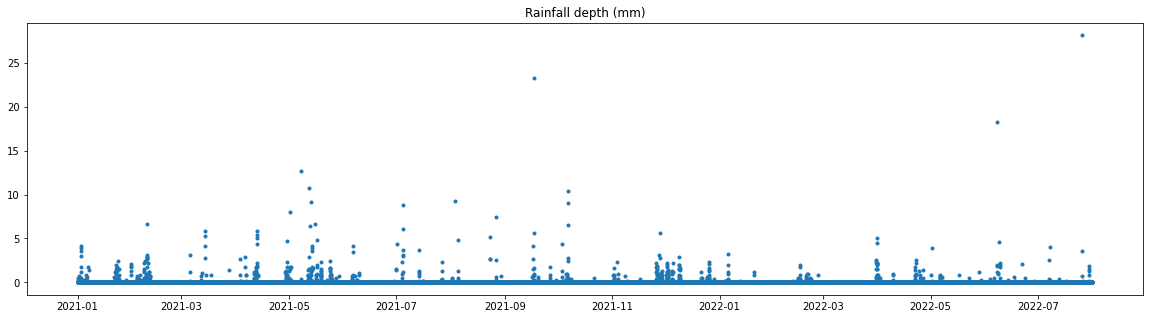

In [31]:
plt.figure(figsize=(20,5)) 
plt.plot(df_w.index.values, df_w['rain'],linestyle="",marker=".")

plt.title('Rainfall depth (mm)')
plt.show()

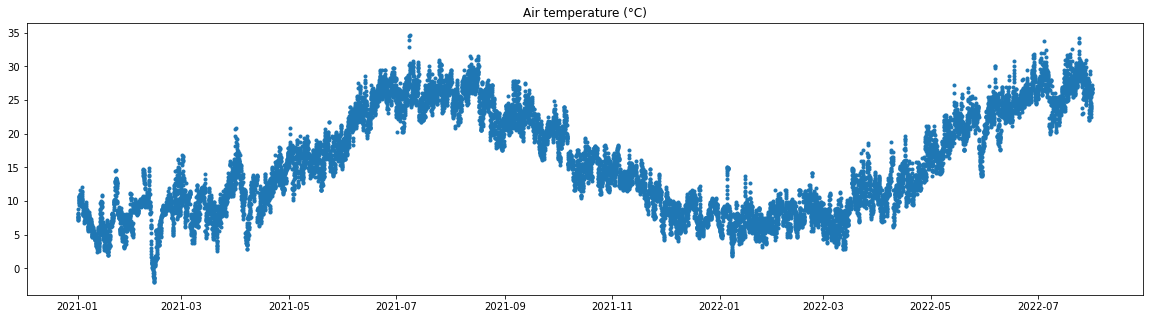

In [32]:
plt.figure(figsize=(20,5)) 
plt.plot(df_w.index.values, df_w['temperature'],linestyle="",marker=".")

plt.title('Air temperature (°C)')
plt.show()

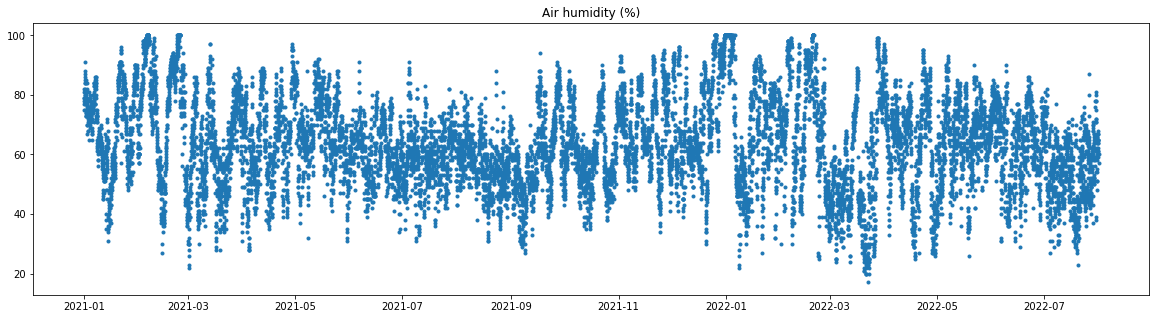

In [33]:
plt.figure(figsize=(20,5)) 
plt.plot(df_w.index.values, df_w['humidity'],linestyle="",marker=".")

plt.title('Air humidity (%)')
plt.show()

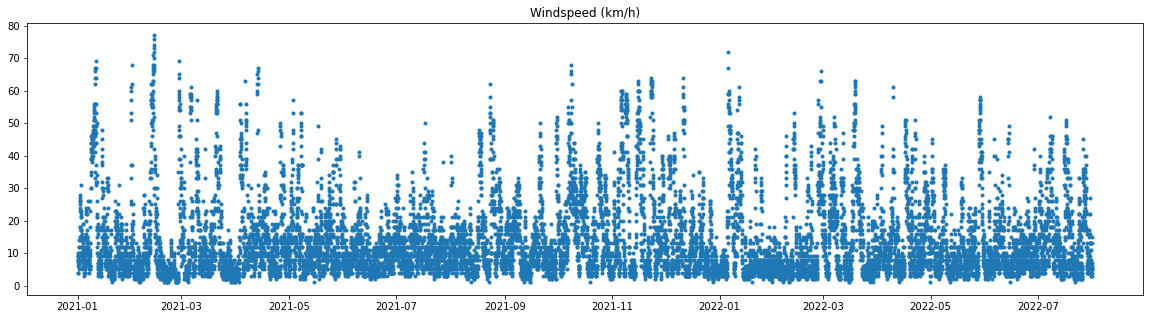

In [34]:
plt.figure(figsize=(20,5)) 
plt.plot(df_w.index.values, df_w['windspeed'],linestyle="",marker=".")

plt.title('Windspeed (km/h)')
plt.show()

<a id='sec:eda_joint'></a>
# 3. Exploratory analysis of joint data

It will be useful to have all the data in a unique dataframe. Given the indices are the same in both ´df´ and ´df_w´, it is easy to concatenate them

In [35]:
df_joint = pd.concat([df, df_w], axis=0)

In [36]:
df_joint.head()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J,rain,temperature,humidity,windspeed
datetime,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,NaN,NaN,2.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,NaN,NaN,2.7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_joint.tail()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J,rain,temperature,humidity,windspeed
datetime,,,,,,,,,,,,,,
2022-07-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.6,68.0,5.0
2022-07-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.8,65.0,6.0
2022-07-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.7,65.0,5.0
2022-07-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.8,57.0,7.0
2022-07-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.6,60.0,5.0


In [38]:
df_joint.describe()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J,rain,temperature,humidity,windspeed
count,12914.000000,13092.000000,13587.000000,12773.000000,12954.000000,11800.000000,12204.000000,12567.000000,12174.000000,12801.000000,13847.000000,13847.000000,13101.000000,13831.000000
mean,8.414812,9.559351,4.502163,33.584066,77.532979,8.041829,24.281588,20.282885,19.706999,26.342322,0.061558,15.530476,63.718342,13.885908
std,2.844392,1.865366,1.504020,6.864652,15.042734,2.086164,5.765284,5.785511,3.218423,4.507878,0.540295,7.511963,15.672514,12.300721
min,1.830000,6.270000,1.770000,12.660000,48.680000,2.622500,8.245000,9.360000,13.477500,13.742500,0.000000,-2.100000,17.000000,1.000000
25%,6.382500,8.309375,3.515000,27.932500,63.630625,6.517500,20.203750,15.092500,17.250000,22.575000,0.000000,9.000000,53.000000,5.000000
50%,8.327500,9.272500,4.357500,34.657500,81.055000,7.940000,24.961250,21.602500,19.255000,26.100000,0.000000,14.200000,63.000000,9.000000
75%,10.330000,10.532500,5.235000,38.607500,88.106875,9.447500,28.197500,24.785000,21.830000,29.977500,0.000000,22.500000,75.000000,18.000000
max,29.747500,21.017500,11.675000,55.955000,113.635000,19.105000,42.102500,83.132500,41.745000,43.970000,28.100000,34.600000,100.000000,77.000000


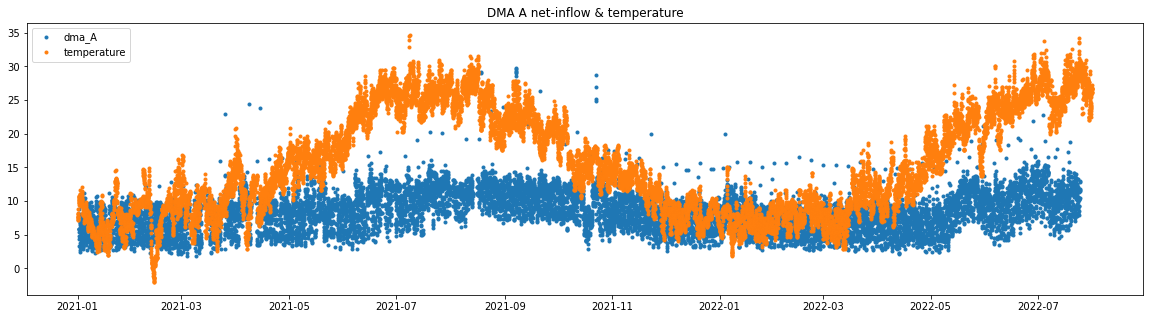

In [39]:
plt.figure(figsize=(20,5)) 
plt.plot(df_joint.index.values, df_joint['dma_A'], df_joint['temperature'],linestyle="",marker=".")
plt.legend(['dma_A', 'temperature']) 
plt.title('DMA A net-inflow & temperature')
plt.show()

In [40]:
## TASK: do the remaining plots for the other DMAs (always plotting both net-inflow and temperature,
# keeping in mind that the scales are different and therefore it may be hard to notice any correlation due to that)
#...

For these types of data, it is well known that patterns differ depending on the day of the week. Therefore, we will create an extra column indicating the day of the week (0-Monday, ..., 6-Sunday)

In [41]:
df_joint = df_joint.reset_index() #Drop the index to be able to use it as a new column

#Create new column with the index of the day of the week
# 0: mon, 1:tue, ..., 5:sat, 6:sun
df_joint['day_of_week'] = df_joint['datetime'].dt.dayofweek 

In [42]:
df_joint.head()

,datetime,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J,rain,temperature,humidity,windspeed,day_of_week
0,2021-01-01 00:00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2021-01-01 01:00:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,2021-01-01 02:00:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,2021-01-01 03:00:00,NaN,NaN,2.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,2021-01-01 04:00:00,NaN,NaN,2.7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [43]:
#put back datetime as index 
#remark: the reason why day of the week was not included in original dataframes
# was because the time period is not the same for both data sets; therefore, it seemed to make more sense
# to apply this transformation only to the joint data
df_joint.set_index('datetime', inplace = True)
df_joint.head()

,dma_A,dma_B,dma_C,dma_D,dma_E,dma_F,dma_G,dma_H,dma_I,dma_J,rain,temperature,humidity,windspeed,day_of_week
datetime,,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,3.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2021-01-01 01:00:00,NaN,NaN,3.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2021-01-01 02:00:00,NaN,NaN,3.2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2021-01-01 03:00:00,NaN,NaN,2.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2021-01-01 04:00:00,NaN,NaN,2.7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [44]:
#TASK: create an extra column 'Holiday', that is 0 or 1 depending on wheter the day is a holiday or not
# for this, consider the file Calendar_rev1.pdf also available at the Battle webpage (notice that it is a pdf file
# so you have to build this column "by hand")

#...